# Wavelet Noise 視覺化分析

這個 notebook 用於視覺化和分析 C++ 程式生成的 Wavelet Noise 結果。

基於論文: "Wavelet Noise" by Robert L. Cook and Tony DeRose (2005)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# 設定圖片顯示大小
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

## 1. 載入圖片的輔助函數

In [3]:
def load_bmp(filename):
    """載入 BMP 圖片並轉換為 numpy array"""
    if os.path.exists(filename):
        img = Image.open(filename)
        return np.array(img)
    else:
        print(f"Warning: {filename} not found")
        return None

def plot_comparison(img1, img2, title1, title2, main_title):
    """並排顯示兩張圖片進行比較"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(main_title, fontsize=16)
    
    if img1 is not None:
        ax1.imshow(img1, cmap='gray')
        ax1.set_title(title1)
        ax1.axis('off')
    
    if img2 is not None:
        ax2.imshow(img2, cmap='gray')
        ax2.set_title(title2)
        ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_multiple(images, titles, main_title, cols=3):
    """顯示多張圖片"""
    n = len(images)
    rows = (n + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    fig.suptitle(main_title, fontsize=16)
    
    if rows == 1:
        axes = [axes]
    if cols == 1:
        axes = [[ax] for ax in axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        row = i // cols
        col = i % cols
        
        if img is not None:
            axes[row][col].imshow(img, cmap='gray')
            axes[row][col].set_title(title)
            axes[row][col].axis('off')
    
    # 隱藏多餘的子圖
    for i in range(n, rows * cols):
        row = i // cols
        col = i % cols
        axes[row][col].axis('off')
    
    plt.tight_layout()
    plt.show()

## 2. 視覺比較：Perlin vs Wavelet Noise

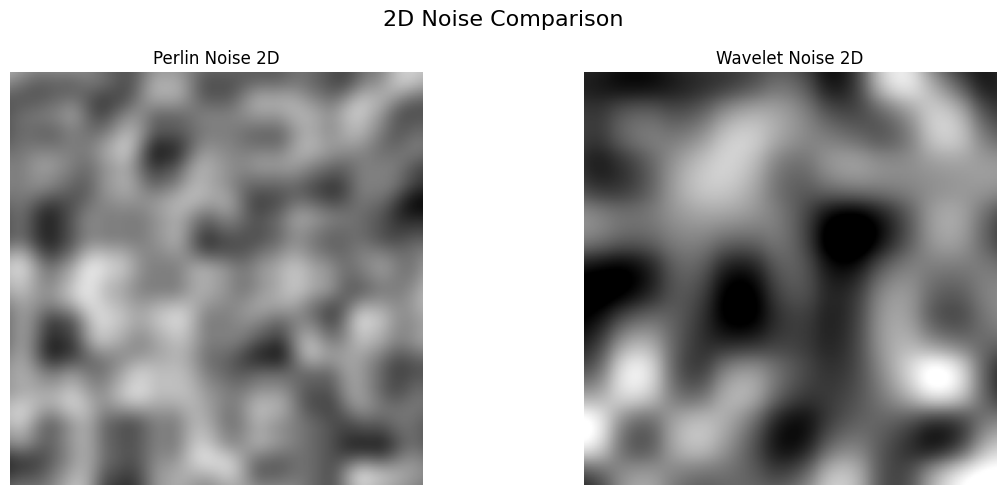

In [4]:
# 載入 2D 噪音比較
wavelet_2d = load_bmp('wavelet_2d.bmp')
perlin_2d = load_bmp('perlin_2d.bmp')

plot_comparison(perlin_2d, wavelet_2d, 
                'Perlin Noise 2D', 'Wavelet Noise 2D',
                '2D Noise Comparison')

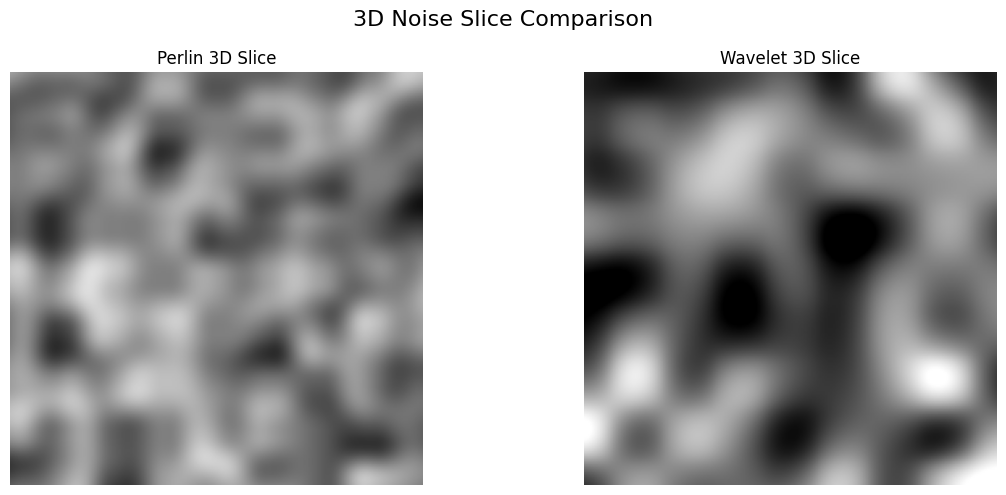

In [5]:
# 載入 3D 切片比較
wavelet_3d_slice = load_bmp('wavelet_3d_slice.bmp')
perlin_3d_slice = load_bmp('perlin_3d_slice.bmp')

plot_comparison(perlin_3d_slice, wavelet_3d_slice,
                'Perlin 3D Slice', 'Wavelet 3D Slice',
                '3D Noise Slice Comparison')

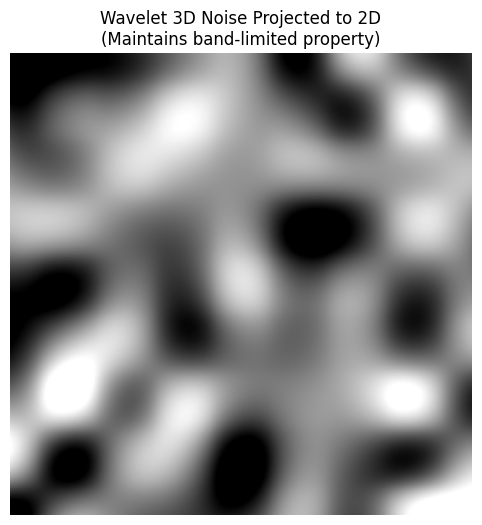

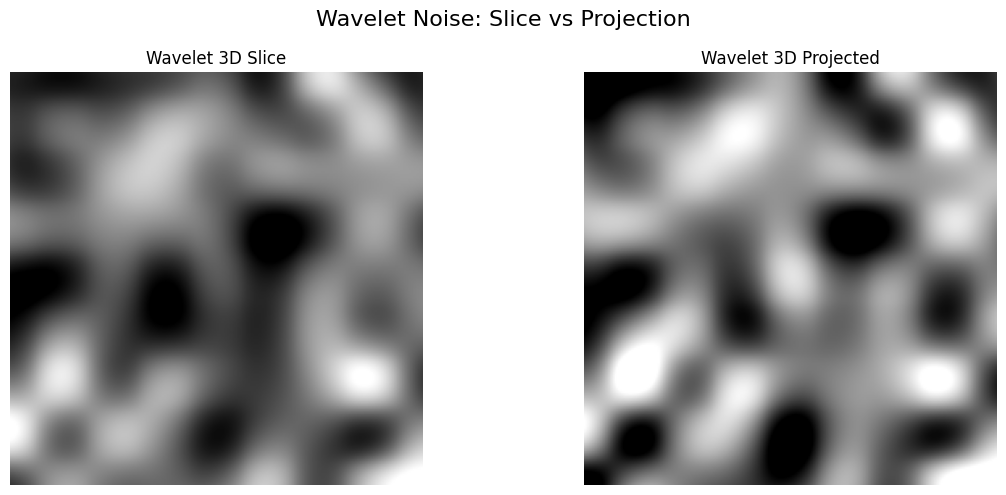

In [6]:
# 3D 投影 (只有 Wavelet 有此功能)
wavelet_3d_projected = load_bmp('wavelet_3d_projected.bmp')

if wavelet_3d_projected is not None:
    plt.figure(figsize=(8, 6))
    plt.imshow(wavelet_3d_projected, cmap='gray')
    plt.title('Wavelet 3D Noise Projected to 2D\n(Maintains band-limited property)')
    plt.axis('off')
    plt.show()

# 比較 3D 切片與投影
if wavelet_3d_slice is not None and wavelet_3d_projected is not None:
    plot_comparison(wavelet_3d_slice, wavelet_3d_projected,
                    'Wavelet 3D Slice', 'Wavelet 3D Projected',
                    'Wavelet Noise: Slice vs Projection')

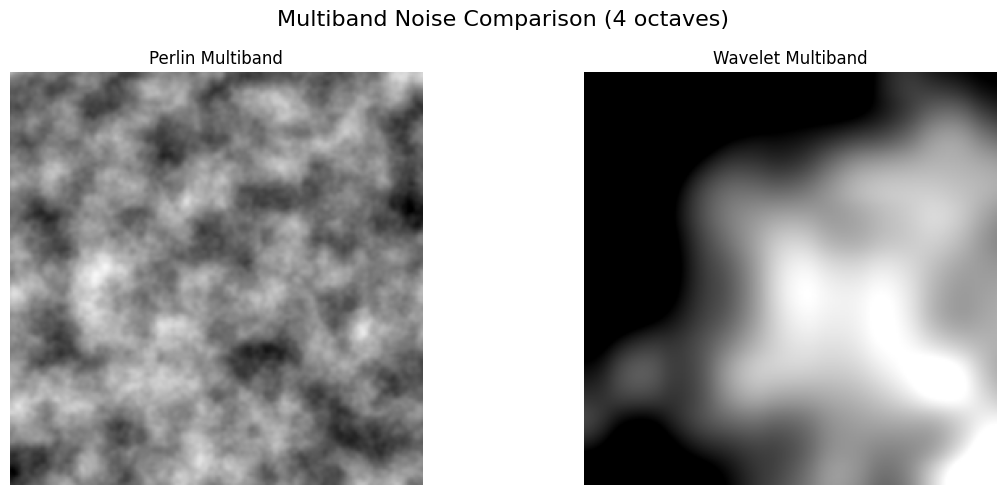

In [7]:
# 多頻帶噪音比較
wavelet_multi = load_bmp('wavelet_multiband.bmp')
perlin_multi = load_bmp('perlin_multiband.bmp')

plot_comparison(perlin_multi, wavelet_multi,
                'Perlin Multiband', 'Wavelet Multiband',
                'Multiband Noise Comparison (4 octaves)')

## 3. 頻譜分析 (Fourier Transform)

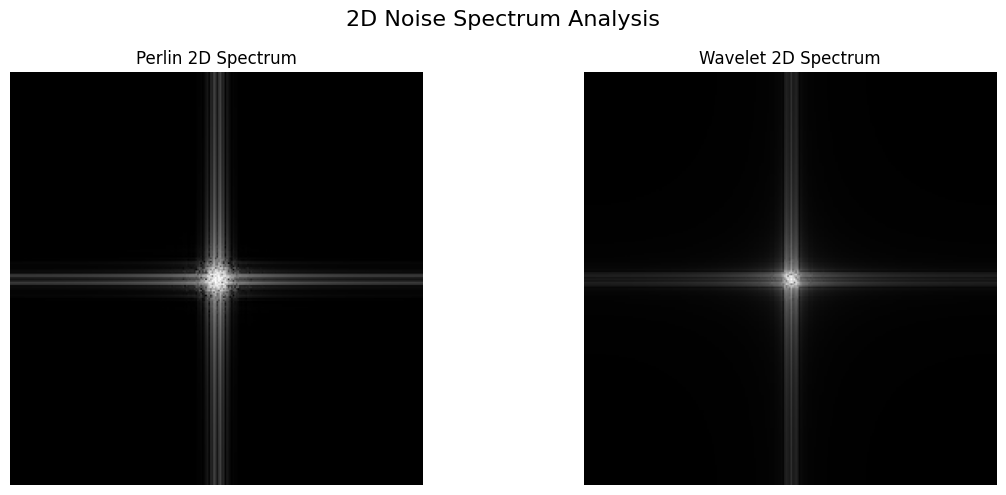

觀察重點：
1. Wavelet 頻譜應該呈現方形的帶限特性（中心區域較暗）
2. Perlin 頻譜中心（低頻）可能有更多能量堆積
3. 理想的帶限噪音在 |fx| < 0.5 且 |fy| < 0.5 範圍外應該是暗的


In [8]:
# 載入頻譜圖
spectrum_wavelet_2d = load_bmp('spectrum_wavelet_2d.bmp')
spectrum_perlin_2d = load_bmp('spectrum_perlin_2d.bmp')

plot_comparison(spectrum_perlin_2d, spectrum_wavelet_2d,
                'Perlin 2D Spectrum', 'Wavelet 2D Spectrum',
                '2D Noise Spectrum Analysis')

# 添加說明
print("觀察重點：")
print("1. Wavelet 頻譜應該呈現方形的帶限特性（中心區域較暗）")
print("2. Perlin 頻譜中心（低頻）可能有更多能量堆積")
print("3. 理想的帶限噪音在 |fx| < 0.5 且 |fy| < 0.5 範圍外應該是暗的")

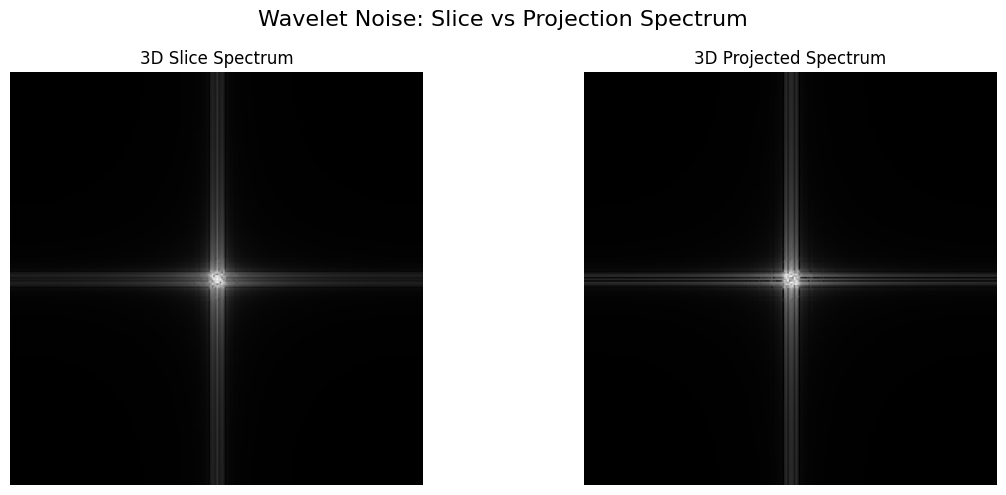


觀察重點：
- 3D 切片的頻譜會失去帶限性（有低頻能量洩漏）
- 3D 投影的頻譜應該保持帶限性（類似 2D Wavelet 頻譜）


In [9]:
# 3D 切片與投影的頻譜比較
spectrum_slice = load_bmp('spectrum_wavelet_3d_slice.bmp')
spectrum_projected = load_bmp('spectrum_wavelet_3d_projected.bmp')

if spectrum_slice is not None and spectrum_projected is not None:
    plot_comparison(spectrum_slice, spectrum_projected,
                    '3D Slice Spectrum', '3D Projected Spectrum',
                    'Wavelet Noise: Slice vs Projection Spectrum')
    
    print("\n觀察重點：")
    print("- 3D 切片的頻譜會失去帶限性（有低頻能量洩漏）")
    print("- 3D 投影的頻譜應該保持帶限性（類似 2D Wavelet 頻譜）")

## 4. 頻帶分析 (Individual Frequency Bands)

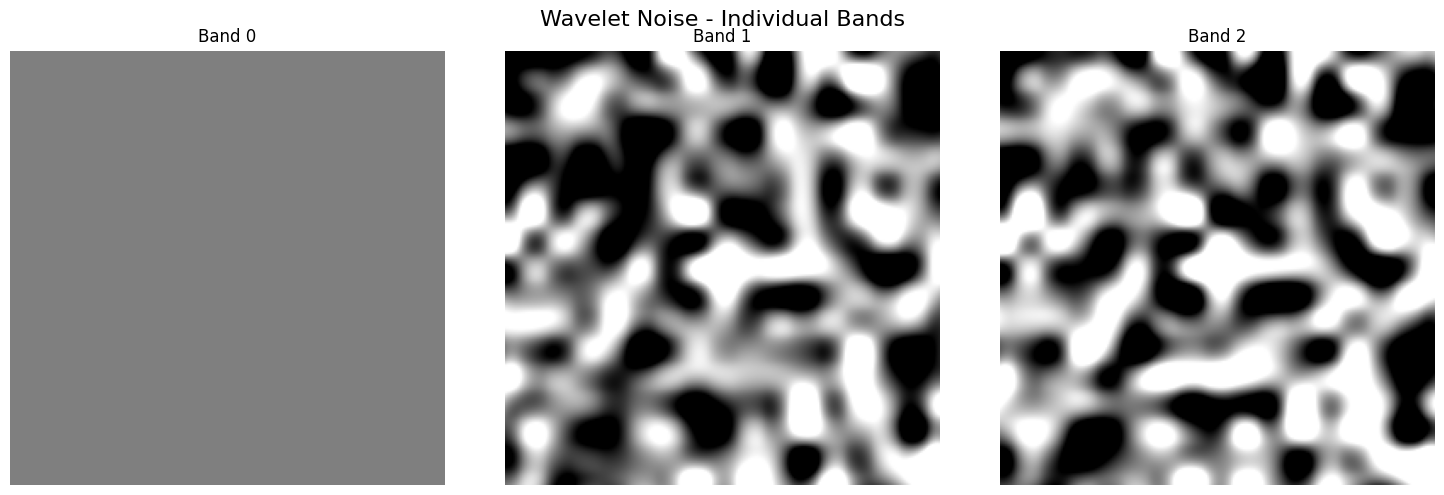

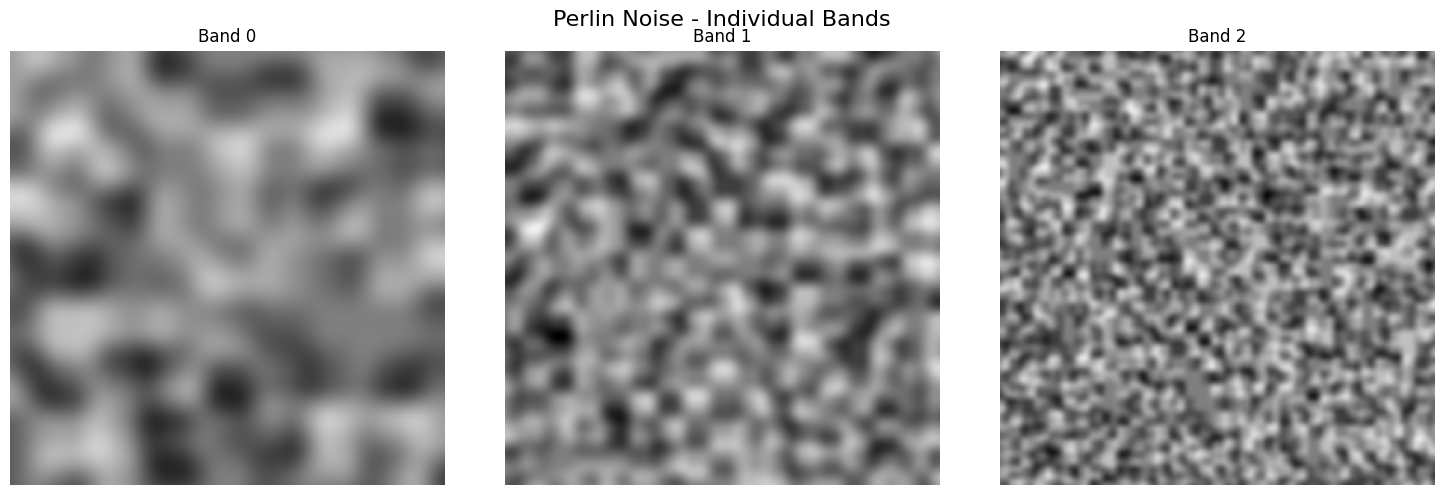

In [10]:
# 載入各個頻帶
wavelet_bands = []
perlin_bands = []
band_titles = []

for i in range(3):
    wb = load_bmp(f'wavelet_band_{i}.bmp')
    pb = load_bmp(f'perlin_band_{i}.bmp')
    if wb is not None:
        wavelet_bands.append(wb)
    if pb is not None:
        perlin_bands.append(pb)
    band_titles.append(f'Band {i}')

if wavelet_bands:
    plot_multiple(wavelet_bands, band_titles, 'Wavelet Noise - Individual Bands', cols=3)

if perlin_bands:
    plot_multiple(perlin_bands, band_titles, 'Perlin Noise - Individual Bands', cols=3)

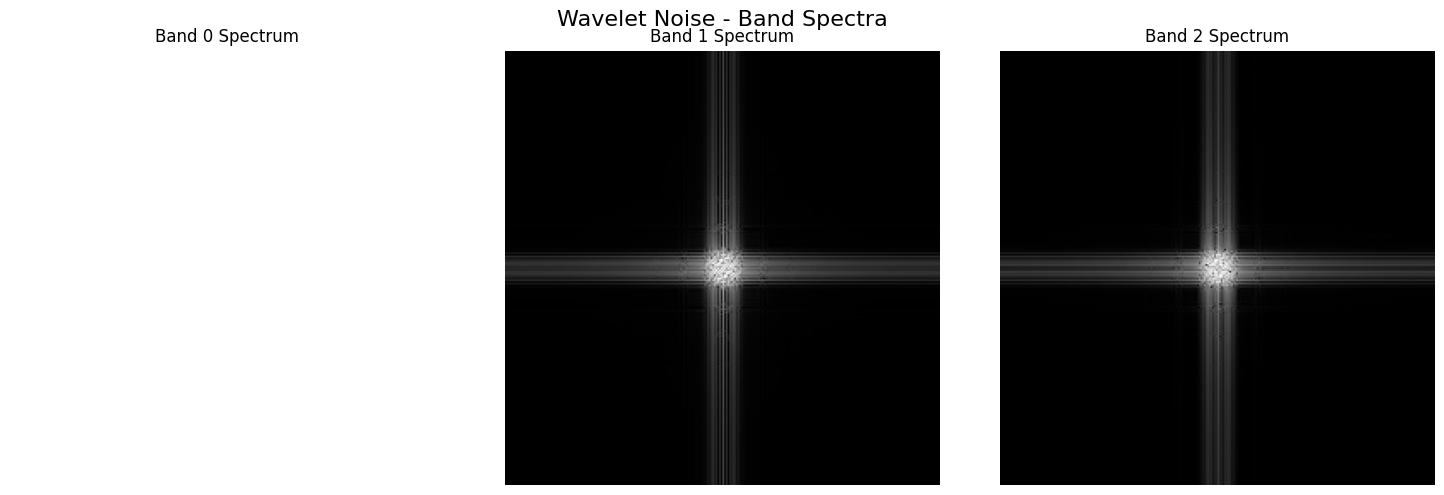

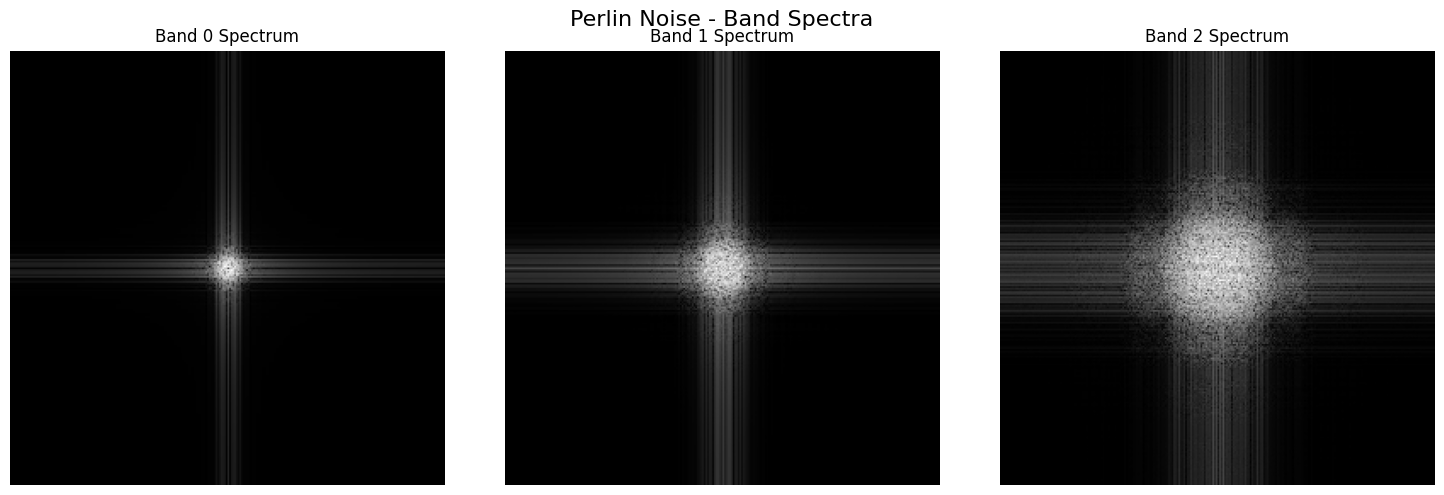


觀察重點：
- Wavelet 各頻帶應該有明確的頻率範圍分離
- Perlin 頻帶之間可能有重疊
- 高頻帶（Band 2）應該在頻譜外圍有更多能量


In [11]:
# 各頻帶的頻譜
wavelet_band_spectra = []
perlin_band_spectra = []
spectrum_titles = []

for i in range(3):
    ws = load_bmp(f'spectrum_wavelet_band_{i}.bmp')
    ps = load_bmp(f'spectrum_perlin_band_{i}.bmp')
    if ws is not None:
        wavelet_band_spectra.append(ws)
    if ps is not None:
        perlin_band_spectra.append(ps)
    spectrum_titles.append(f'Band {i} Spectrum')

if wavelet_band_spectra:
    plot_multiple(wavelet_band_spectra, spectrum_titles, 
                  'Wavelet Noise - Band Spectra', cols=3)

if perlin_band_spectra:
    plot_multiple(perlin_band_spectra, spectrum_titles, 
                  'Perlin Noise - Band Spectra', cols=3)

print("\n觀察重點：")
print("- Wavelet 各頻帶應該有明確的頻率範圍分離")
print("- Perlin 頻帶之間可能有重疊")
print("- 高頻帶（Band 2）應該在頻譜外圍有更多能量")

## 5. 綜合分析與統計


Wavelet 2D Noise Statistics:
  Mean: -0.1459
  Std Dev: 0.4323
  Min: -1.0000
  Max: 1.0000


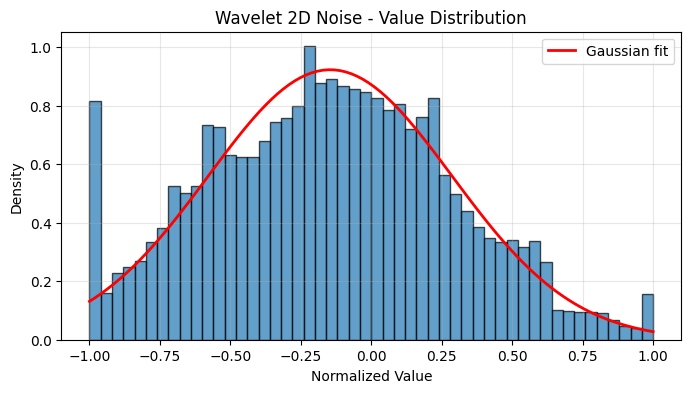


Perlin 2D Noise Statistics:
  Mean: 0.0243
  Std Dev: 0.2684
  Min: -0.8745
  Max: 0.7569


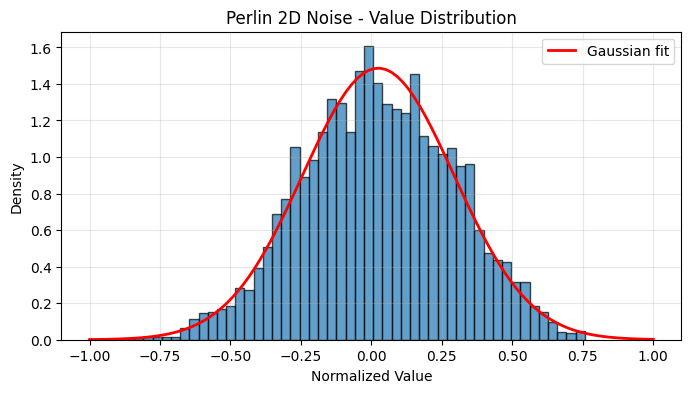

In [12]:
def analyze_noise_statistics(img, name):
    """分析噪音的統計特性"""
    if img is None:
        return
    
    # 轉換為灰階值
    if len(img.shape) == 3:
        gray = img[:,:,0]
    else:
        gray = img
    
    # 正規化到 [-1, 1]
    normalized = (gray.astype(float) - 127.5) / 127.5
    
    print(f"\n{name} Statistics:")
    print(f"  Mean: {np.mean(normalized):.4f}")
    print(f"  Std Dev: {np.std(normalized):.4f}")
    print(f"  Min: {np.min(normalized):.4f}")
    print(f"  Max: {np.max(normalized):.4f}")
    
    # 繪製直方圖
    plt.figure(figsize=(8, 4))
    plt.hist(normalized.flatten(), bins=50, density=True, alpha=0.7, edgecolor='black')
    plt.title(f'{name} - Value Distribution')
    plt.xlabel('Normalized Value')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    
    # 疊加正態分布曲線
    x = np.linspace(-1, 1, 100)
    plt.plot(x, 1/np.sqrt(2*np.pi*np.std(normalized)**2) * 
             np.exp(-(x-np.mean(normalized))**2/(2*np.std(normalized)**2)), 
             'r-', linewidth=2, label='Gaussian fit')
    plt.legend()
    plt.show()

# 分析各種噪音的統計特性
analyze_noise_statistics(wavelet_2d, 'Wavelet 2D Noise')
analyze_noise_statistics(perlin_2d, 'Perlin 2D Noise')

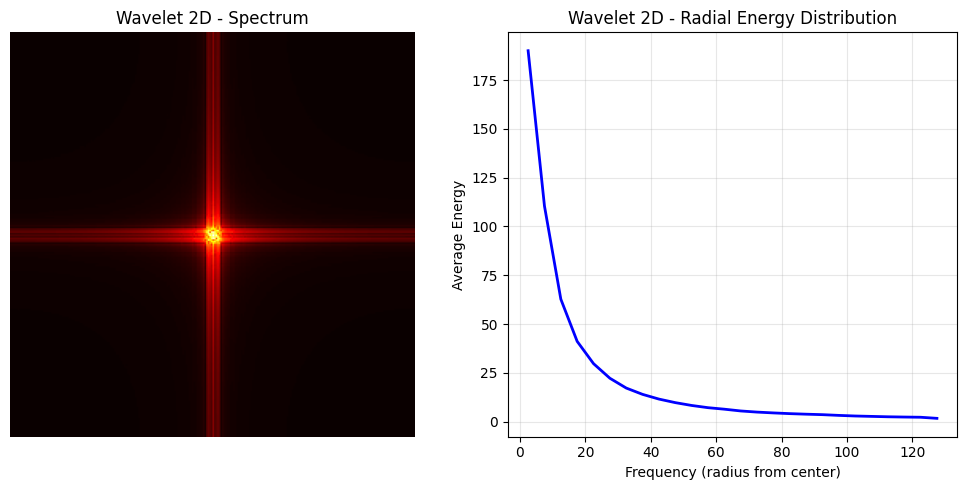

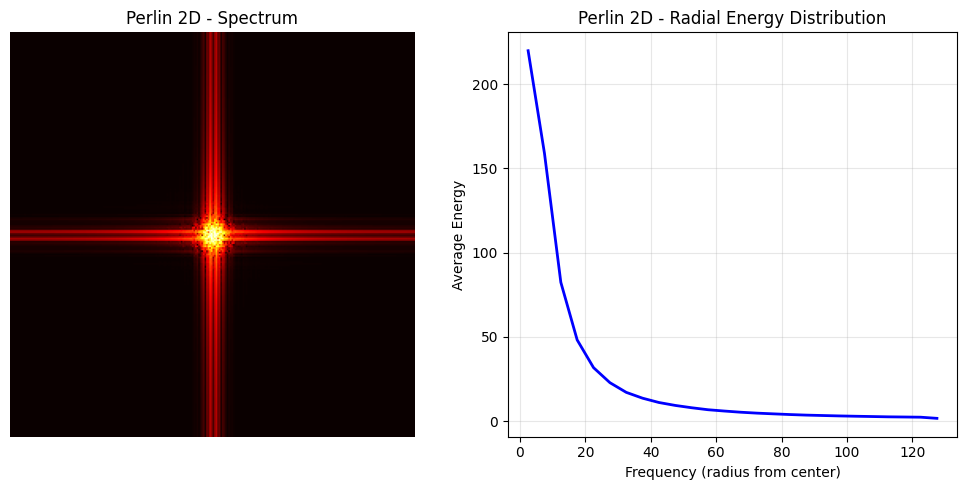

In [13]:
def compute_frequency_energy(spectrum_img, name):
    """計算頻譜的能量分布"""
    if spectrum_img is None:
        return
    
    # 轉換為灰階
    if len(spectrum_img.shape) == 3:
        spectrum = spectrum_img[:,:,0].astype(float)
    else:
        spectrum = spectrum_img.astype(float)
    
    h, w = spectrum.shape
    center_y, center_x = h//2, w//2
    
    # 計算徑向能量分布
    max_radius = min(center_x, center_y)
    radial_energy = []
    radii = []
    
    for r in range(0, max_radius, 5):
        energy = 0
        count = 0
        
        for y in range(h):
            for x in range(w):
                dist = np.sqrt((x - center_x)**2 + (y - center_y)**2)
                if r <= dist < r + 5:
                    energy += spectrum[y, x]
                    count += 1
        
        if count > 0:
            radial_energy.append(energy / count)
            radii.append(r + 2.5)
    
    # 繪製徑向能量分布
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(spectrum, cmap='hot')
    plt.title(f'{name} - Spectrum')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.plot(radii, radial_energy, 'b-', linewidth=2)
    plt.title(f'{name} - Radial Energy Distribution')
    plt.xlabel('Frequency (radius from center)')
    plt.ylabel('Average Energy')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 分析頻譜能量分布
compute_frequency_energy(spectrum_wavelet_2d, 'Wavelet 2D')
compute_frequency_energy(spectrum_perlin_2d, 'Perlin 2D')

## 6. 總結與觀察

根據論文，我們應該觀察到以下特點：

### 視覺比較：
1. **Wavelet Noise** 在各種尺度下都保持清晰的細節
2. **3D 投影**比**3D 切片**有更好的視覺品質
3. **多頻帶 Wavelet Noise** 的細節保留比 Perlin 更好

### 頻譜分析：
1. **Wavelet 2D 頻譜**呈現方形的帶限特性
2. **Perlin 2D 頻譜**中心有能量堆積（低頻洩漏）
3. **3D Wavelet 投影**保持帶限性，而**切片**失去帶限性

### 頻帶分析：
1. **Wavelet 各頻帶**之間有清晰的分離
2. **Perlin 頻帶**之間有重疊

這些結果驗證了論文的主要論點：Wavelet Noise 提供了更好的頻帶控制和細節保留。

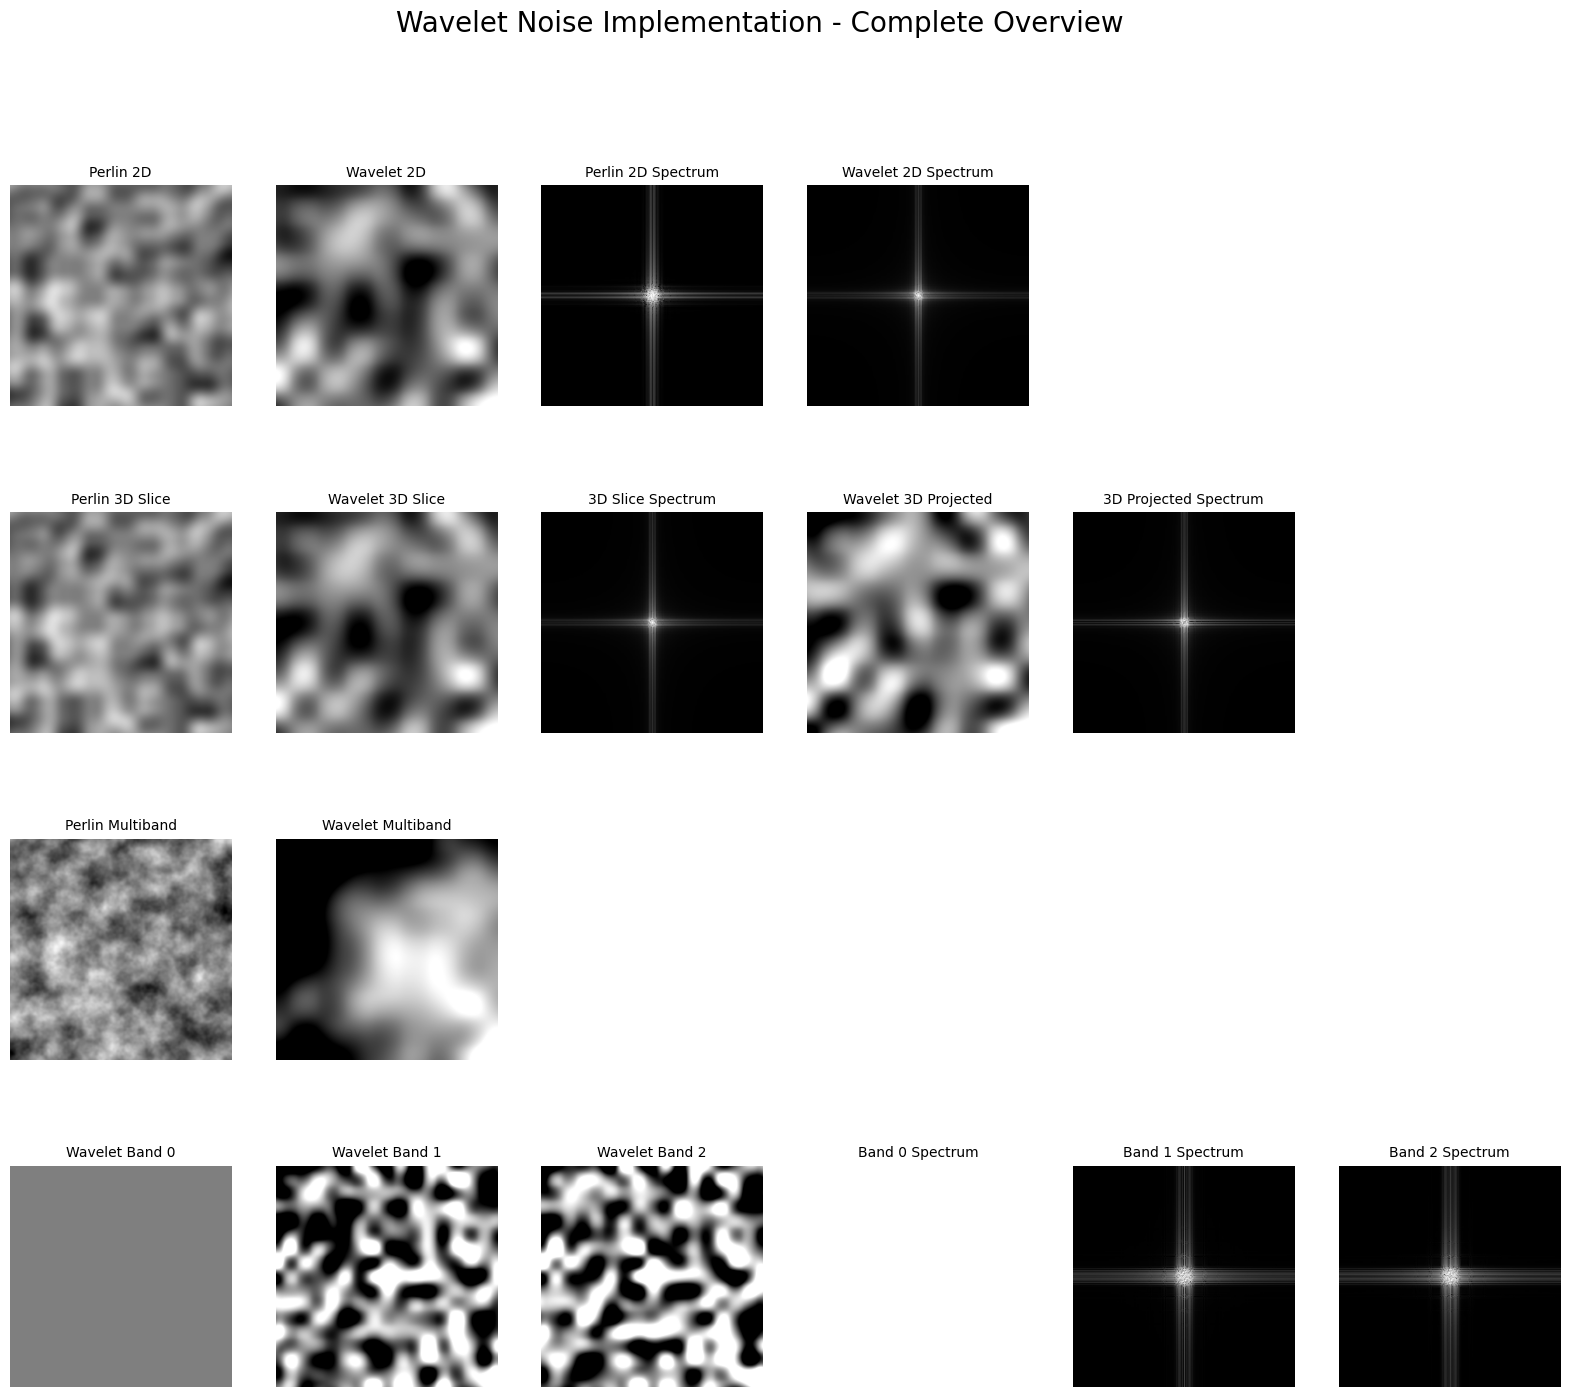

In [14]:
# 生成所有圖片的縮圖總覽
def create_overview():
    """創建所有結果的總覽圖"""
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(4, 6, figure=fig, hspace=0.3, wspace=0.2)
    
    # 定義要顯示的圖片
    images_info = [
        # Row 1: 2D Noise
        ('perlin_2d.bmp', 'Perlin 2D', 0, 0),
        ('wavelet_2d.bmp', 'Wavelet 2D', 0, 1),
        ('spectrum_perlin_2d.bmp', 'Perlin 2D Spectrum', 0, 2),
        ('spectrum_wavelet_2d.bmp', 'Wavelet 2D Spectrum', 0, 3),
        
        # Row 2: 3D Slice
        ('perlin_3d_slice.bmp', 'Perlin 3D Slice', 1, 0),
        ('wavelet_3d_slice.bmp', 'Wavelet 3D Slice', 1, 1),
        ('spectrum_wavelet_3d_slice.bmp', '3D Slice Spectrum', 1, 2),
        ('wavelet_3d_projected.bmp', 'Wavelet 3D Projected', 1, 3),
        ('spectrum_wavelet_3d_projected.bmp', '3D Projected Spectrum', 1, 4),
        
        # Row 3: Multiband
        ('perlin_multiband.bmp', 'Perlin Multiband', 2, 0),
        ('wavelet_multiband.bmp', 'Wavelet Multiband', 2, 1),
        
        # Row 4: Individual Bands
        ('wavelet_band_0.bmp', 'Wavelet Band 0', 3, 0),
        ('wavelet_band_1.bmp', 'Wavelet Band 1', 3, 1),
        ('wavelet_band_2.bmp', 'Wavelet Band 2', 3, 2),
        ('spectrum_wavelet_band_0.bmp', 'Band 0 Spectrum', 3, 3),
        ('spectrum_wavelet_band_1.bmp', 'Band 1 Spectrum', 3, 4),
        ('spectrum_wavelet_band_2.bmp', 'Band 2 Spectrum', 3, 5),
    ]
    
    for filename, title, row, col in images_info:
        img = load_bmp(filename)
        if img is not None:
            ax = fig.add_subplot(gs[row, col])
            ax.imshow(img, cmap='gray')
            ax.set_title(title, fontsize=10)
            ax.axis('off')
    
    fig.suptitle('Wavelet Noise Implementation - Complete Overview', fontsize=20)
    plt.tight_layout()
    plt.show()

create_overview()